## Model Training

### 1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [37]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Modeling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

Import the CSV as Pandas DataFrame

In [26]:
df = pd.read_csv('data/StudentsPerformance.csv')


Preparing X and Y variables

In [27]:
X = df.drop('math score', axis=1)
y = df['math score']

In [28]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

sd_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHot", oh_transformer, cat_features),
        ("SD", sd_transformer, num_features)
    ]
)

In [29]:
# Separate dataset into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 7), (200, 7), (800,), (200,))

In [30]:
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
29,female,group D,master's degree,standard,none,70,75
535,female,group C,bachelor's degree,free/reduced,completed,83,83
695,female,group D,some college,free/reduced,none,89,86
557,male,group C,master's degree,free/reduced,none,67,66
836,male,group E,high school,standard,none,64,57
...,...,...,...,...,...,...,...
106,female,group D,master's degree,standard,none,100,100
270,male,group C,bachelor's degree,standard,none,63,61
860,female,group C,associate's degree,standard,none,62,53
435,male,group C,some college,free/reduced,completed,48,53


In [31]:
X_train = preprocessor.fit_transform(X_train)

In [34]:
pd.DataFrame(X_train).shape

(800, 19)

Create an Evaluation Function to give all metrics after model training

In [51]:
def evaluate_model(ground_truth, preds):
    mae = mean_absolute_error(ground_truth, preds)
    mse = mean_squared_error(ground_truth, preds)
    rmse = np.sqrt(mean_squared_error(ground_truth, preds))
    r_two_score = r2_score(ground_truth, preds)
    return mae, rmse, r_two_score

In [65]:
models = {
    "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "K-Neighbors Regressor": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor(),
        "XGBRegressor": XGBRegressor(), 
        "CatBoosting Regressor": CatBoostRegressor(verbose=False),
        "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(preprocessor.transform(X_test))

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
        
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
            
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- R2 Score: {model_train_r2:.4f}")
        
    print('----------------------------------')
            
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- Mean Absolute Error: {model_test_mae:.4f}")
    print(f"- R2 Score: {model_test_r2:.4f}")
    r2_list.append(model_test_r2)
            
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6998
- Mean Absolute Error: 4.5083
- R2 Score: 0.8559
-----------------------

Results

In [73]:
results = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2_Score'])
results.sort_values(by=['R2_Score'], ascending=False)

,Model,R2_Score
2,Ridge,0.880592
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851831
5,Random Forest Regressor,0.849400
8,AdaBoost Regressor,0.846797
6,XGBRegressor,0.827797
1,Lasso,0.825446
3,K-Neighbors Regressor,0.786134
4,Decision Tree,0.725670


### Linear Regression

In [76]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg = linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(preprocessor.transform(X_test))
score = r2_score(y_test, y_pred)*100
print(f"The accuracy of the model is {score:.2f}")

The accuracy of the model is 88.04


#### Plot y_pred and y_test

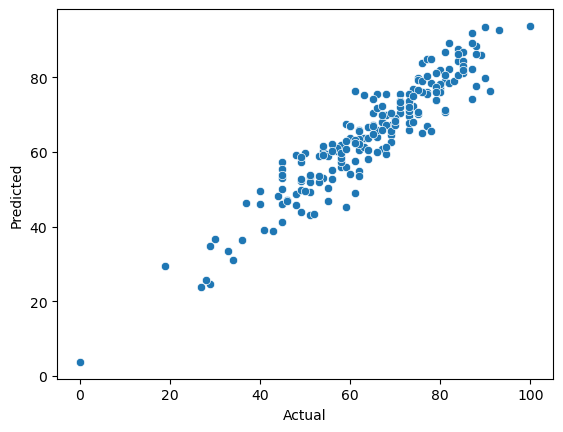

In [79]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

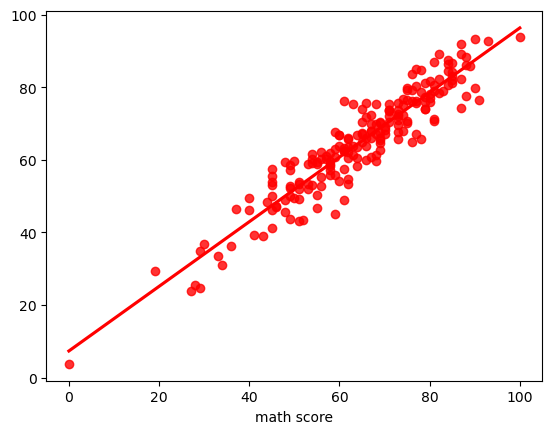

In [81]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')
plt.show()

In [83]:
pred_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value': y_pred, "Difference": abs(y_test-y_pred)})
pred_df

,Actual Values,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,5.885970
740,80,76.990265,3.009735
660,74,76.851804,2.851804
411,84,87.627378,3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,0.152214
208,74,67.888395,6.111605
613,65,67.022287,2.022287
